In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_lfw_people

In [2]:
class KnnClassifier():
    def __init__(self):
        
        """初始化kNN分类器"""
        self.neigh = None
        self.n_neighbors = None

    def train(self, X, y):
        """
        拟合训练数据集中的knn分类器
        
        参数: X：输入变量 y：输出向量

        """
        self.neigh.fit(X, y)


    def pred(self, X):
        "预测函数"
        
        return self.neigh.predict(X)

    def accuracy(self, X, y):
        "通过测试数据集得到准确率"
        return self.neigh.score(X, y)

In [3]:
class DimensionalityReductor():
    def __init__(self, X):
        self.X = X
        
    def reduce(self, n_dim):
        #直接跳到下一部分
        return NotImplemented


class PCADimensionalityReductor(DimensionalityReductor):
    def __init__(self, X):
        super().__init__(X)
        # Sorting eigen values
        mean_vec = np.mean(X, axis=0)
        self.centralized_x = self.X - mean_vec
        cov_mat = (1 / (self.centralized_x.shape[0])) * (np.dot(self.centralized_x.T, self.centralized_x))
        eig_values, eig_vectors = np.linalg.eig(cov_mat)
        self.idx = np.argsort(eig_values)[::-1]
        self.eig_vectors = eig_vectors[:, self.idx]

    def reduce(self, n_dim):
        """
        返回一个修改后的数据集，其中n_dim特征是基于高方差区域计算的
        """
        return self.centralized_x.dot(self.eig_vectors[:, :n_dim])


In [4]:
# dataset = fetch_lfw_people(min_faces_per_person=100)
dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.2)
#读取数据集

In [5]:
dataset.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [6]:
dataset['target'][:20]

array([2, 3, 1, 4, 1, 0, 2, 0, 2, 1, 3, 0, 2, 2, 4, 3, 2, 2, 2, 2],
      dtype=int64)

In [7]:
dataset['target_names']

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [8]:
# 从“图像”属性中检索图像的形状，并将高度存储为h，将w存储为宽度
h = dataset['images'].shape[1]
w = dataset['images'].shape[2]

# 将特征检索到X数组中，将输出检索到y数组中，并将目标名称检索到target_names中
X = dataset['data']
y = dataset['target']
target_names = dataset['target_names']

X = np.array(X)
y = np.array(y)

# 声明我们需要的对象
pca_dr = PCADimensionalityReductor(X)
kc = KnnClassifier()
# 定义k值为3 
neigh = KNeighborsClassifier(n_neighbors=3)

pca_dr = PCADimensionalityReductor(X)


# plot_gallery和titles是我们将用于人脸识别可视化的辅助功能
# plot_gallery用于制作原始图像的子图
# titles用来在图像中注释这些图像与预测和实际名称的人名
def plot_gallery(images, titles, h, w, rows, cols):
    plt.figure(figsize = (10, 14))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
        plt.subplots_adjust(hspace = 1.0, wspace = 1.0)

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        actual_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\nactual: {1}'.format(pred_name, actual_name)

        #we are going to use the 100 most important features
feat100 = pca_dr.reduce(100)
X_train, X_test, y_train, y_test = train_test_split(feat100, y, test_size=0.2, random_state=32) 
knn = KnnClassifier()
knn.neigh = neigh
knn.train(X_train, y_train)
pred = knn.pred(X_test)
score = knn.neigh.score(X_test, y_test)
print(score)

0.6403508771929824


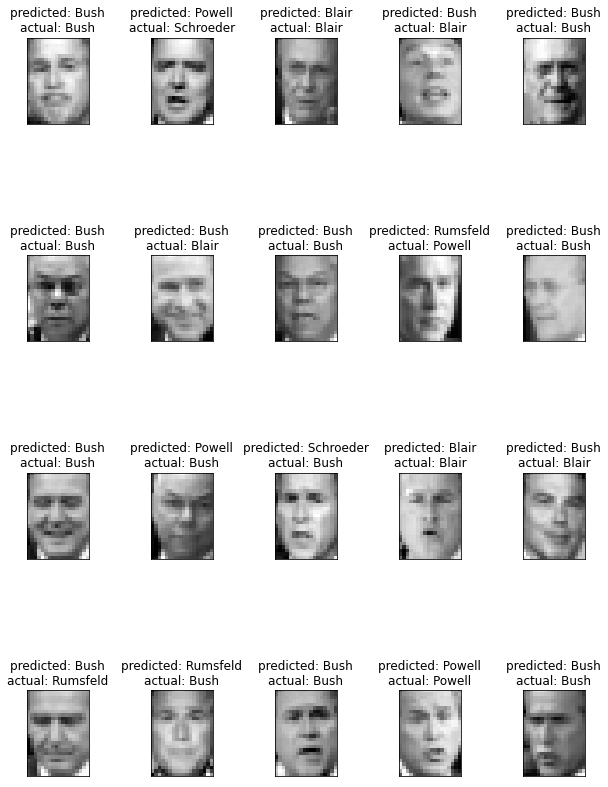

In [9]:
#Make a subplot for the first 20 images with their annotations using the helper functions provided 
targets = list(titles(pred, y_test, target_names))[:20]
plot_gallery(X[:20], targets, h, w, 4,5)

In [10]:
print("Knn accuracy:", score)

Knn accuracy: 0.6403508771929824


In [11]:
# 使用循环寻找最好的k值
best_score = 0.0
best_k = -1

for k in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    knn = KnnClassifier()
    knn.neigh = neigh
    knn.train(X_train, y_train)
    pred = knn.pred(X_test)
    score = knn.neigh.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
print("best_k = ", best_k)
print("best_score = ", best_score)


best_k =  5
best_score =  0.6447368421052632


In [12]:
# weights参数默认值'uniform'不考虑距离，'distance'为考虑距离

best_method = ""
best_score = 0.0
best_k = -1
for method in ['uniform', 'distance']:
    for k in range(1,11):
        neigh = KNeighborsClassifier(n_neighbors=k)
        knn = KnnClassifier()
        knn.neigh = neigh
        knn.train(X_train, y_train)
        pred = knn.pred(X_test)
        score = knn.neigh.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method

print("best_k = ", best_k)
print("best_score = ", best_score)
print("best_method = ", best_method)


best_k =  5
best_score =  0.6447368421052632
best_method =  uniform


In [13]:
# 寻找最好的距离参数p
#%%time
best_p = -1
best_score = 0.0
best_k = -1
for k in range(1,11):
    for p in range (1,6):
        neigh = KNeighborsClassifier(n_neighbors=k,weights='distance', p=p,metric='minkowski')
        knn = KnnClassifier()
        knn.neigh = neigh
        knn.train(X_train, y_train)
        pred = knn.pred(X_test)
        score = knn.neigh.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p= p

print("best_k = ", best_k)
print("best_p = ", best_p)
print("best_score = ", best_score)

best_k =  4
best_p =  1
best_score =  0.7368421052631579


In [14]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ['ball_tree', 'kd_tree','brute']:
    for k in range(1,11):
        neigh = KNeighborsClassifier(n_neighbors=k)
        knn = KnnClassifier()
        knn.neigh = neigh
        knn.train(X_train, y_train)
        pred = knn.pred(X_test)
        score = knn.neigh.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method

print("best_k = ", best_k)
print("best_score = ", best_score)
print("best_method = ", best_method)

best_k =  5
best_score =  0.6447368421052632
best_method =  ball_tree


In [15]:
# 使用循环寻找最好的leaf值
best_p = -1
best_score = 0.0
best_k = -1
for k in range(1,11):
    for l in range (1,20):
        neigh = KNeighborsClassifier(n_neighbors=k,leaf_size=l,algorithm='ball_tree')
        knn = KnnClassifier()
        knn.neigh = neigh
        knn.train(X_train, y_train)
        pred = knn.pred(X_test)
        score = knn.neigh.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_l= l

print("best_k = ", best_k)
print("best_l = ", best_l)
print("best_score = ", best_score)

best_k =  5
best_l =  1
best_score =  0.6447368421052632


In [16]:
#寻求最佳测试集比例
best_score = 0.0
size = -1
for i in range(5,50):
    size=i/100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=32) 
    knn = KnnClassifier()
    knn.neigh = neigh
    knn.train(X_train, y_train)
    score = knn.neigh.score(X_test, y_test)
    if score > best_score:
            best_size = size
            best_score = score
            
print("best_l = ", best_size)
print("best_score = ", best_score)            

best_l =  0.18
best_score =  0.6504854368932039


In [17]:
#最好各种参数的情况
X_train, X_test, y_train, y_test = train_test_split(feat100, y, test_size=0.18, random_state=32) 
neigh = KNeighborsClassifier(n_neighbors=4,leaf_size=l,algorithm='ball_tree',weights='distance', p=1,metric='minkowski')
knn = KnnClassifier()
knn.neigh = neigh
knn.train(X_train, y_train)
pred = knn.pred(X_test)
score = knn.neigh.score(X_test, y_test)
print(score)

0.7427184466019418


0.7368421052631579


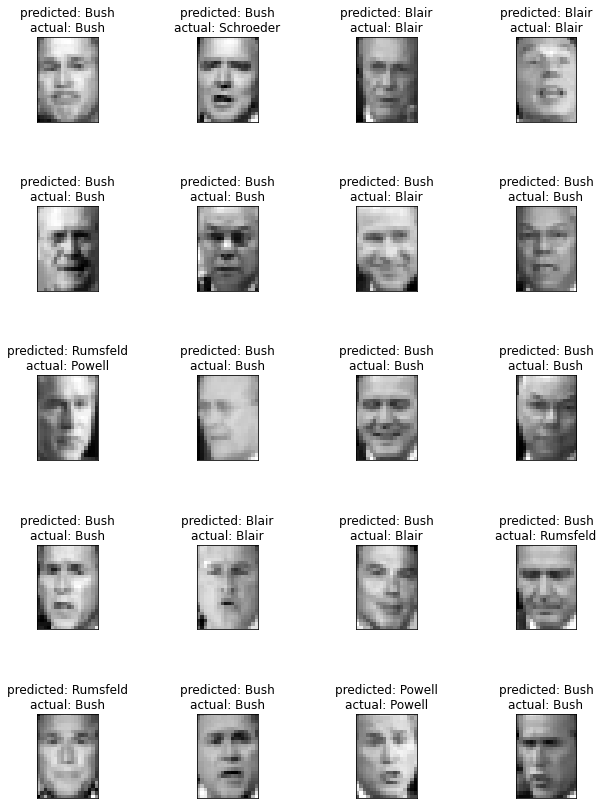

In [20]:
# Do steps 1 to 3 with the full dataset without performing PCA reduction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) 
knn = KnnClassifier()
knn.neigh = neigh
knn.train(X_train, y_train)
score = knn.neigh.score(X_test, y_test)
# Call the titles function to get the annotations for the images
# Call the plot_gallery function to plot the images with their annotations
# Hint: The output of the titles function has to be casted as a list before being passed into the plot_gallery function
targets =list(titles(pred, y_test, target_names))
plot_gallery(X, targets, h, w, 5, 4)
print(score)